HEART DISEASE ANALYSIS PROJECT 


EXPLORATORY DATA ANALYSIS

Importing Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


Data importing and viewing 

In [3]:
data = pd.read_csv(r"C:\Users\khushi\OneDrive\Desktop\heart desease dignostics.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Data Understanding

In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
data.shape

(1025, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Data Attributes 
1.age
2.sex
3.cp- chest pain type (4 values)
          a) typical agina
          b) atypical agina
          c) non-aginal pain
          d) asymptomatic

4.trestbps- resting blood pressure(in mm hg on admission to the hospital)
5.chol- serum cholestoral in mg/dl
6.fbs- fasting blood sugar > 120 mg/dl
                       a) 1 = true
                       b) 0 = false
7.restecg- resting electrocardiographic results
                        a) Value 0: normal
                        b) Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
                        C) Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8.thalach: maximum heart rate achieved
9.exang: exercise induced angina
                         a) 1 = yes
                         b) 0 = no
10.oldpeak = ST depression induced by exercise relative to rest
11.slope: the slope of the peak exercise ST segment
                         a) Value 1: upsloping
                         b) Value 2: flat
                         c) Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal:
                         a) 3 = normal
                         b) 6 = fixed defect
                         c )7 = reversable defect
14. target:
                         a) 0 = less chance of heart attack,
                         b) 1 = more chance of heart attack

Data Processing 

In [10]:
data.rename(columns={
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'Chest Pain',
    'trestbps': 'Resting_BP',
    'chol': 'Cholestrol',
    'fbs': 'Fasting_Blood_Sugar',
    'restecg': 'Resting_Electrocardiographic',
    'thalach': 'Max_Heart_Rate',
    'exang': 'Exercise_Induced_Angina',
    'oldpeak': 'Old_Peak',
    'slope': 'Slope',
    'ca': 'No_Major_Vessels',
    'thal': 'Thal',
    'target': 'Target'
}, inplace=True)
      
    

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1025 non-null   int64  
 1   Sex                           1025 non-null   int64  
 2   Chest Pain                    1025 non-null   int64  
 3   Resting_BP                    1025 non-null   int64  
 4   Cholestrol                    1025 non-null   int64  
 5   Fasting_Blood_Sugar           1025 non-null   int64  
 6   Resting_Electrocardiographic  1025 non-null   int64  
 7   Max_Heart_Rate                1025 non-null   int64  
 8   Exercise_Induced_Angina       1025 non-null   int64  
 9   Old_Peak                      1025 non-null   float64
 10  Slope                         1025 non-null   int64  
 11  No_Major_Vessels              1025 non-null   int64  
 12  Thal                          1025 non-null   int64  
 13  Tar

Data Transformation

In [12]:
data.replace({'Sex':{0:'Females',1:'Males'}},inplace=True) 

In [13]:
data.replace({'Target':{0: 'Clean',1:'Disease'}},inplace=True)

In [14]:
data.head()

,Age,Sex,Chest Pain,Resting_BP,Cholestrol,Fasting_Blood_Sugar,Resting_Electrocardiographic,Max_Heart_Rate,Exercise_Induced_Angina,Old_Peak,Slope,No_Major_Vessels,Thal,Target
0,52,Males,0,125,212,0,1,168,0,1.0,2,2,3,Clean
1,53,Males,0,140,203,1,0,155,1,3.1,0,0,3,Clean
2,70,Males,0,145,174,0,1,125,1,2.6,0,0,3,Clean
3,61,Males,0,148,203,0,1,161,0,0.0,2,1,3,Clean
4,62,Females,0,138,294,1,1,106,0,1.9,1,3,2,Clean


Data Visualization

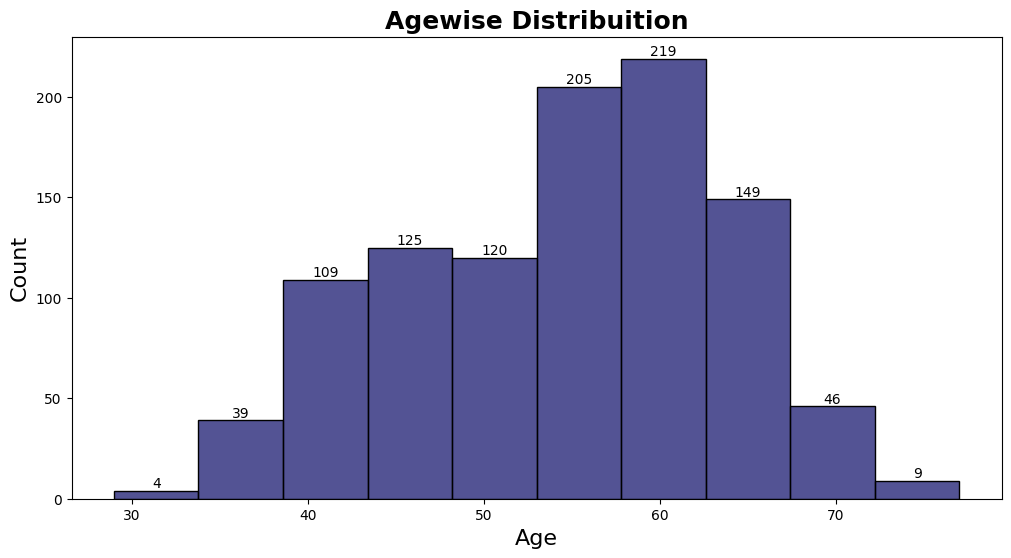

In [19]:
plt.figure(figsize=(12,6))
plt.title('Agewise Distribuition', fontsize=18, fontweight='bold')
ax = sns.histplot(data['Age'], bins=10, color='midnightblue')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

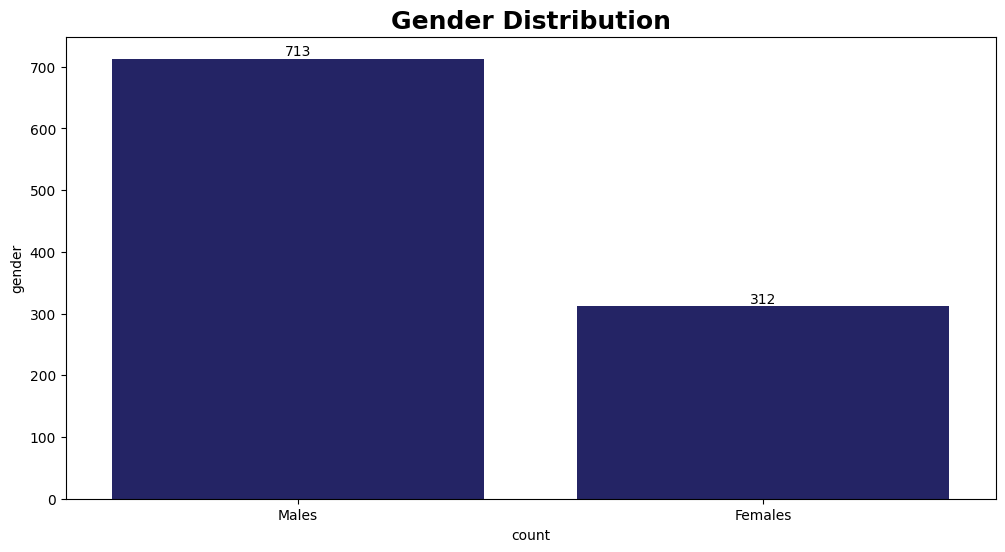

In [20]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution',fontsize=18,fontweight='bold')
ax= sns.countplot(x=data['Sex'],color='midnightblue')
plt.xlabel('count')
plt.ylabel('gender')
plt.show
for lab in ax.containers:
    ax.bar_label(lab)


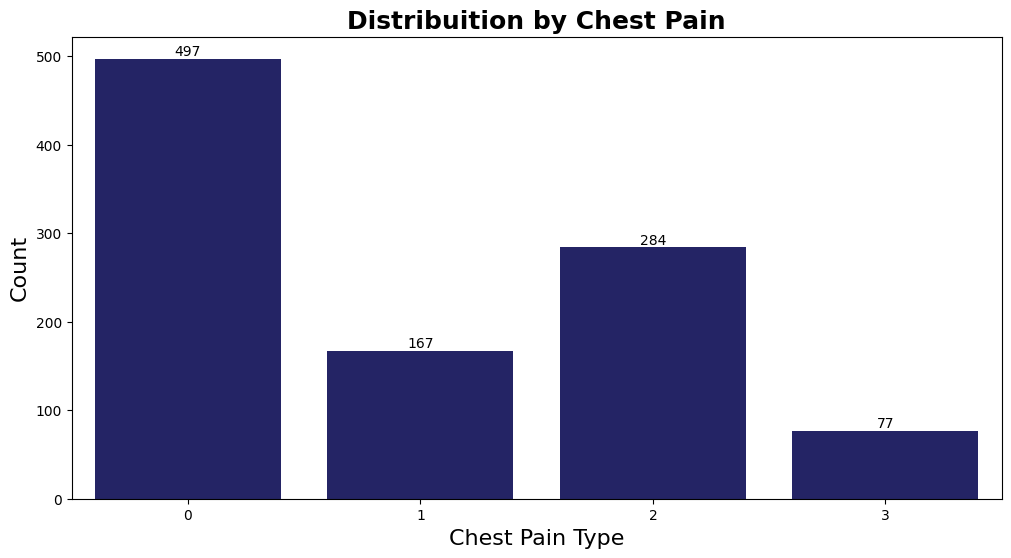

In [21]:
plt.figure(figsize=(12,6))
plt.title('Distribuition by Chest Pain', fontsize=18, fontweight='bold')
ax = sns.barplot(x=data['Chest Pain'].value_counts().index, y=data['Chest Pain'].value_counts().values, color='midnightblue')
plt.xlabel('Chest Pain Type', fontsize=16)
plt.ylabel('Count', fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

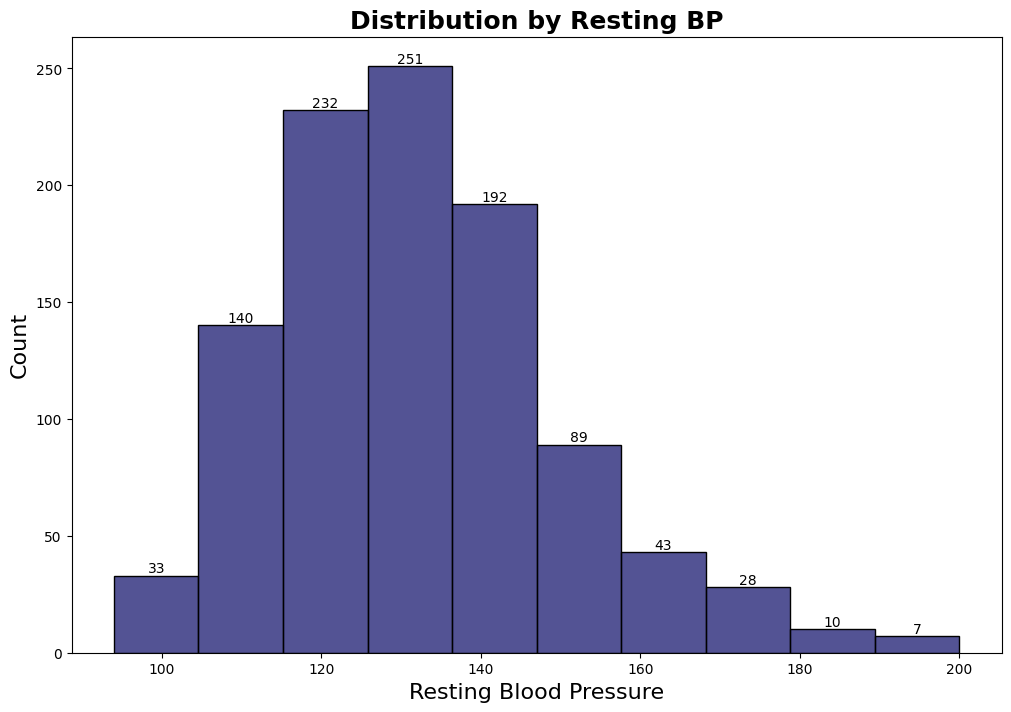

In [22]:
plt.figure(figsize=(12,8))
plt.title('Distribution by Resting BP', fontsize=18, fontweight='bold')
ax= sns.histplot(x=data['Resting_BP'],bins=10,color='midnightblue')
plt.xlabel('Resting Blood Pressure',fontsize=16)
plt.ylabel('Count',fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

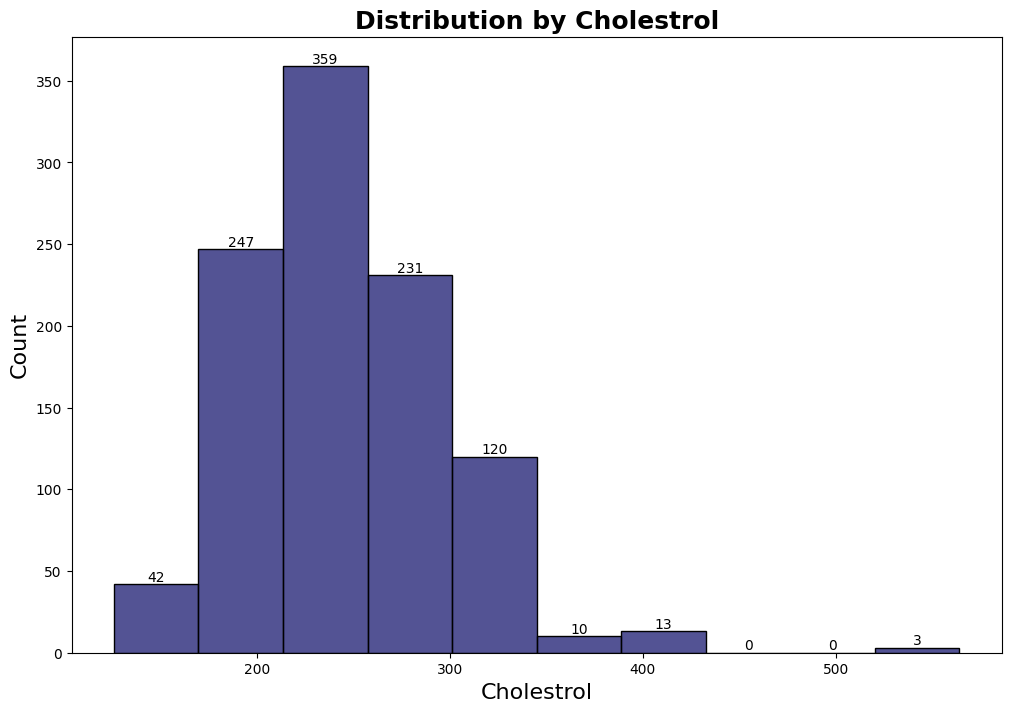

In [23]:
plt.figure(figsize=(12,8))
plt.title('Distribution by Cholestrol', fontsize=18, fontweight='bold')
ax= sns.histplot(x=data['Cholestrol'],bins=10,color='midnightblue')
plt.xlabel('Cholestrol',fontsize=16)
plt.ylabel('Count',fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

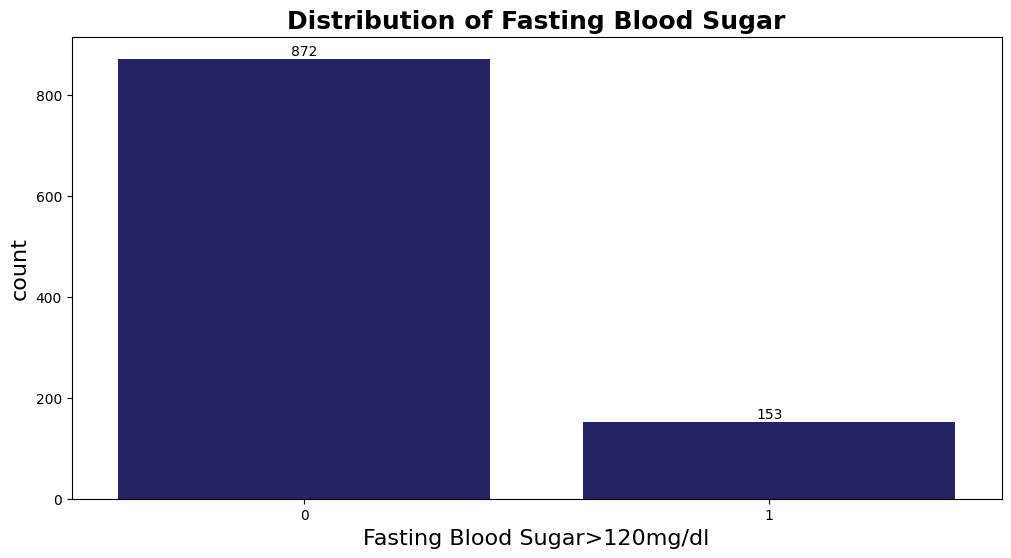

In [24]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Fasting Blood Sugar',fontsize=18,fontweight='bold')
ax= sns.barplot(x=data['Fasting_Blood_Sugar'].value_counts().index, y=data['Fasting_Blood_Sugar'].value_counts().values,color='midnightblue')
plt.xlabel('Fasting Blood Sugar>120mg/dl',fontsize=16)
plt.ylabel('count',fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

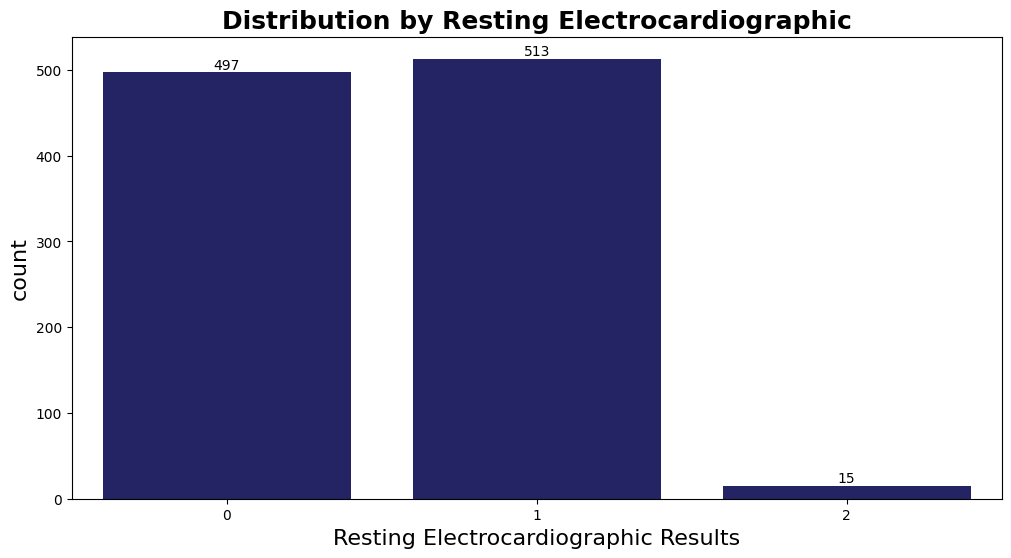

In [25]:
plt.figure(figsize=(12,6))
plt.title('Distribution by Resting Electrocardiographic',fontsize=18,fontweight='bold')
ax= sns.barplot(x=data['Resting_Electrocardiographic'].value_counts().index, y=data['Resting_Electrocardiographic'].value_counts().values,color='midnightblue')
plt.xlabel('Resting Electrocardiographic Results',fontsize=16)
plt.ylabel('count',fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

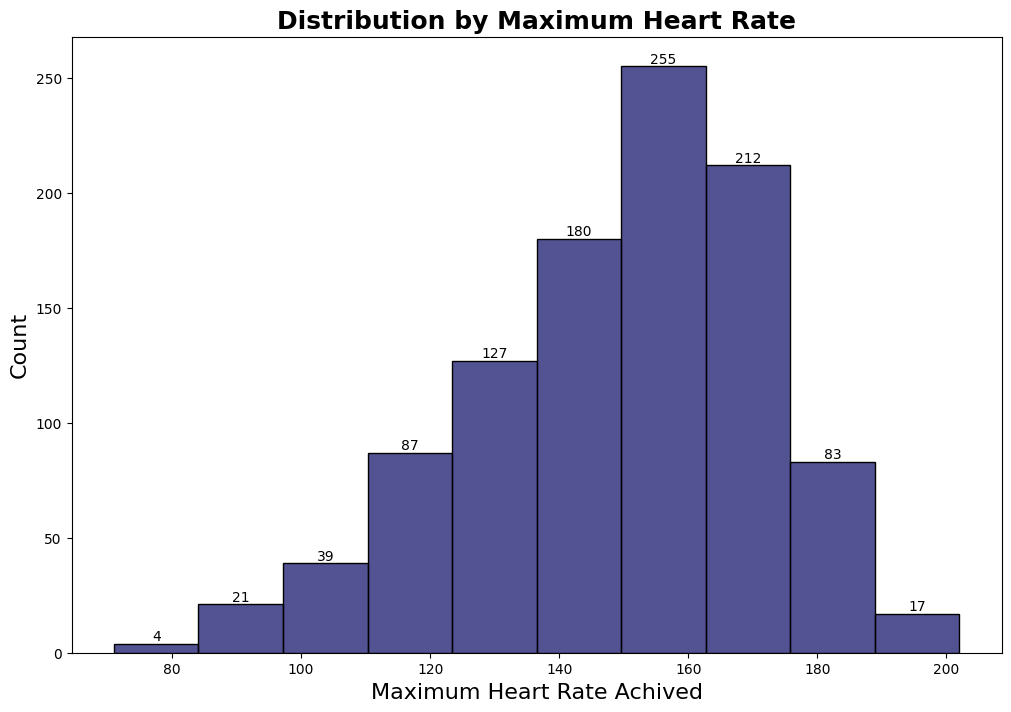

In [26]:
plt.figure(figsize=(12,8))
plt.title('Distribution by Maximum Heart Rate', fontsize=18, fontweight='bold')
ax= sns.histplot(x=data['Max_Heart_Rate'],bins=10,color='midnightblue')
plt.xlabel('Maximum Heart Rate Achived',fontsize=16)
plt.ylabel('Count',fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

In [27]:
data.head()

,Age,Sex,Chest Pain,Resting_BP,Cholestrol,Fasting_Blood_Sugar,Resting_Electrocardiographic,Max_Heart_Rate,Exercise_Induced_Angina,Old_Peak,Slope,No_Major_Vessels,Thal,Target
0,52,Males,0,125,212,0,1,168,0,1.0,2,2,3,Clean
1,53,Males,0,140,203,1,0,155,1,3.1,0,0,3,Clean
2,70,Males,0,145,174,0,1,125,1,2.6,0,0,3,Clean
3,61,Males,0,148,203,0,1,161,0,0.0,2,1,3,Clean
4,62,Females,0,138,294,1,1,106,0,1.9,1,3,2,Clean


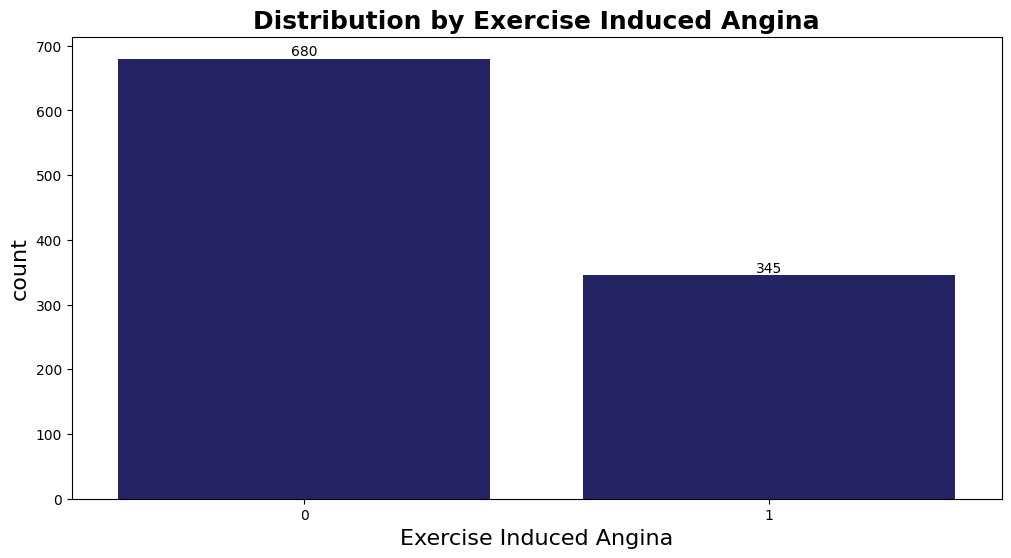

In [28]:
plt.figure(figsize=(12,6))
plt.title('Distribution by Exercise Induced Angina',fontsize=18,fontweight='bold')
ax= sns.barplot(x= data['Exercise_Induced_Angina'].value_counts().index, y= data['Exercise_Induced_Angina'].value_counts().values,color='midnightblue')
plt.xlabel('Exercise Induced Angina',fontsize=16)
plt.ylabel('count',fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

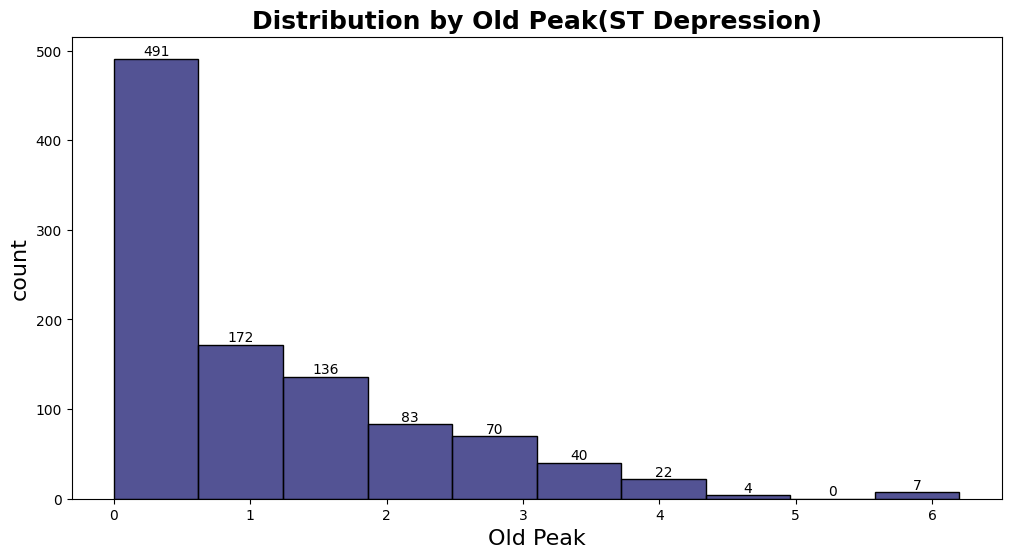

In [29]:
plt.figure(figsize=(12,6))
plt.title('Distribution by Old Peak(ST Depression)',fontsize=18,fontweight='bold')
ax= sns.histplot(x= data['Old_Peak'],bins=10, color='midnightblue')
plt.xlabel('Old Peak',fontsize=16)
plt.ylabel('count',fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

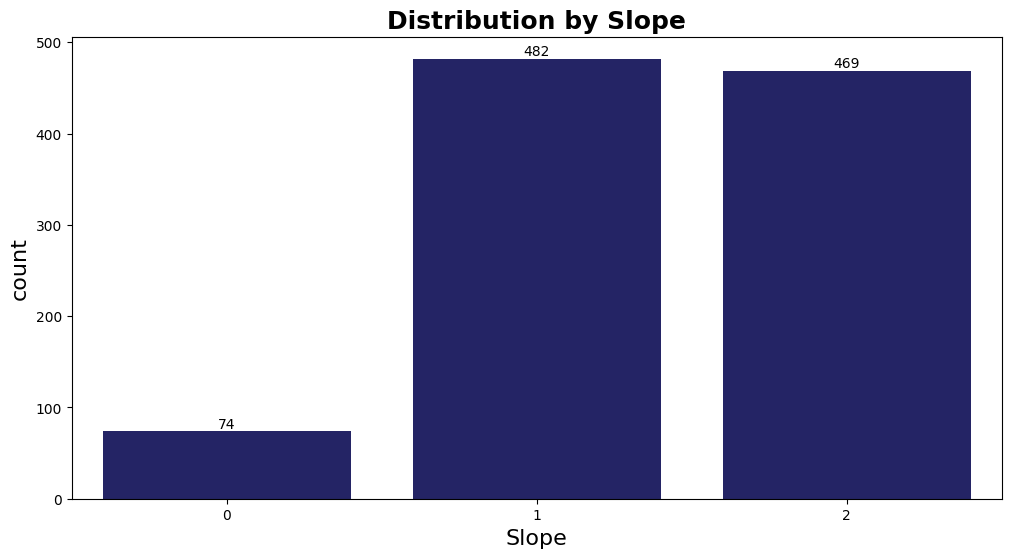

In [31]:
plt.figure(figsize=(12,6))
plt.title('Distribution by Slope',fontsize=18,fontweight='bold')
ax= sns.barplot(x= data['Slope'].value_counts().index, y= data['Slope'].value_counts().values,color='midnightblue')
plt.xlabel('Slope',fontsize=16)
plt.ylabel('count',fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

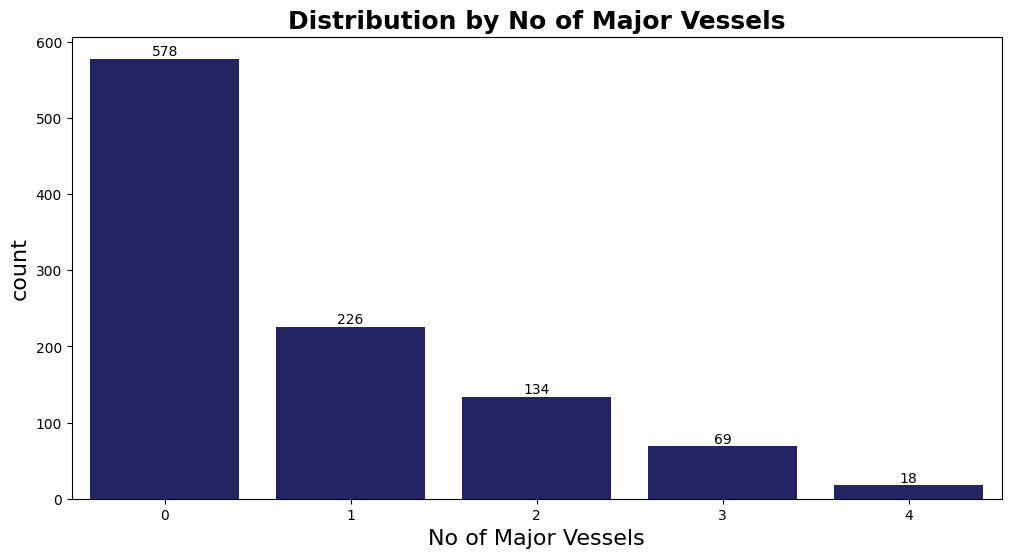

In [32]:
plt.figure(figsize=(12,6))
plt.title('Distribution by No of Major Vessels',fontsize=18,fontweight='bold')
ax= sns.barplot(x= data['No_Major_Vessels'].value_counts().index, y= data['No_Major_Vessels'].value_counts().values,color='midnightblue')
plt.xlabel('No of Major Vessels',fontsize=16)
plt.ylabel('count',fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

C:\Users\khushi\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\khushi\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


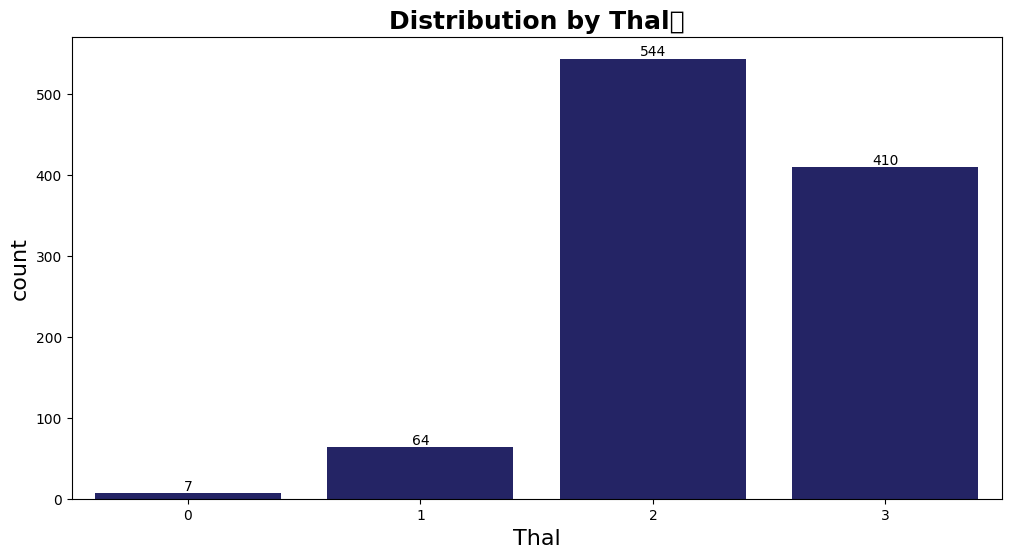

In [33]:
plt.figure(figsize=(12,6))
plt.title('Distribution by Thal	',fontsize=18,fontweight='bold')
ax= sns.barplot(x= data['Thal'].value_counts().index, y= data['Thal'].value_counts().values,color='midnightblue')
plt.xlabel('Thal',fontsize=16)
plt.ylabel('count',fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

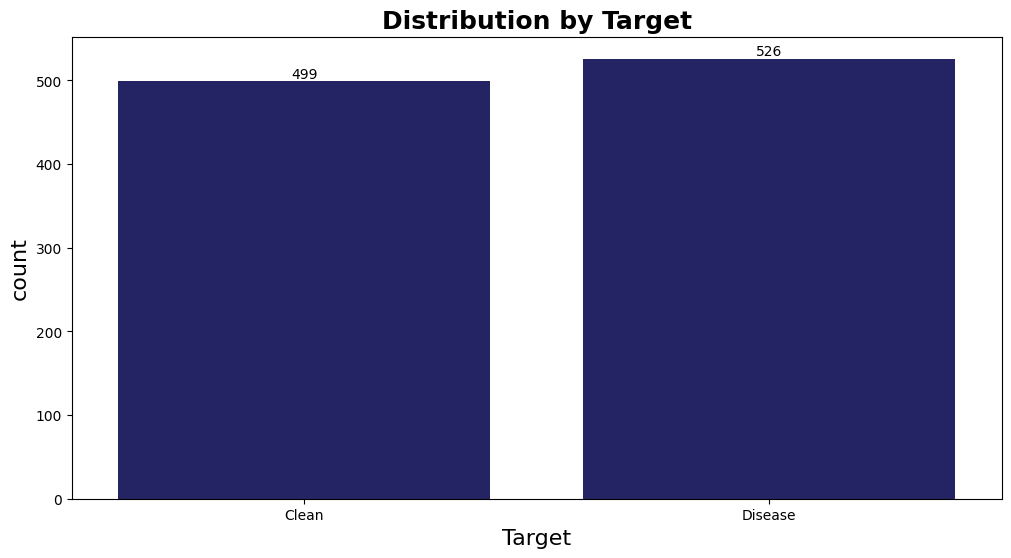

In [34]:
plt.figure(figsize=(12,6))
plt.title('Distribution by Target',fontsize=18,fontweight='bold')
ax= sns.countplot(x= data['Target'],color='midnightblue')
plt.xlabel('Target',fontsize=16)
plt.ylabel('count',fontsize=16)
for lab in ax.containers:
    ax.bar_label(lab)

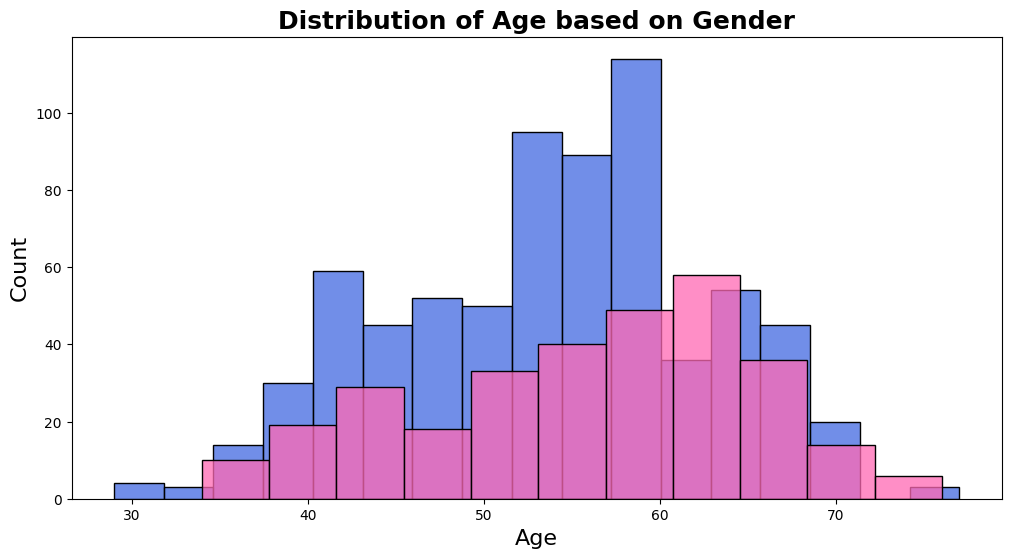

In [35]:
average_age=np.mean(data['Age'])
plt.figure(figsize=(12,6))
plt.title('Distribution of Age based on Gender',fontsize=18,fontweight='bold')
sns.histplot(data[data['Sex'] == 'Males'], x='Age', color='#4169E1')
sns.histplot(data[data['Sex'] == 'Females'], x='Age', color='#FF69B4')
plt.xlabel('Age',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()

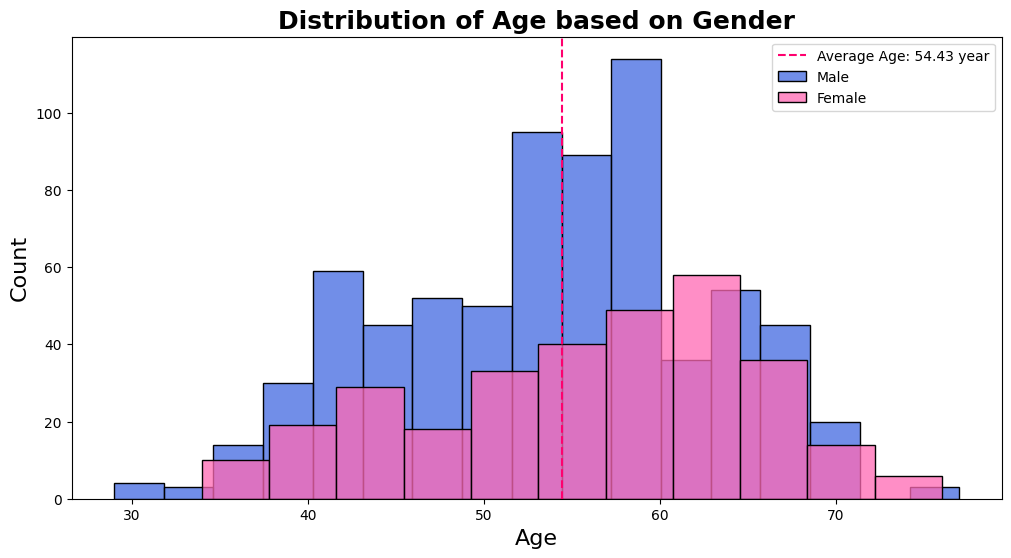

In [51]:
average_age=np.mean(data['Age'])
plt.figure(figsize=(12,6))
plt.title('Distribution of Age based on Gender',fontsize=18,fontweight='bold')
sns.histplot(data[data['Sex']=='Males'],x='Age',color= '#4169E1',label='Male')
sns.histplot(data[data['Sex']=='Females'],x='Age',color= '#FF69B4',label='Female')
plt.axvline(x= average_age ,color='#ff006e', linestyle='--', label=f'Average Age: {average_age:.2f} year')
plt.xlabel('Age',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.legend()
plt.show()


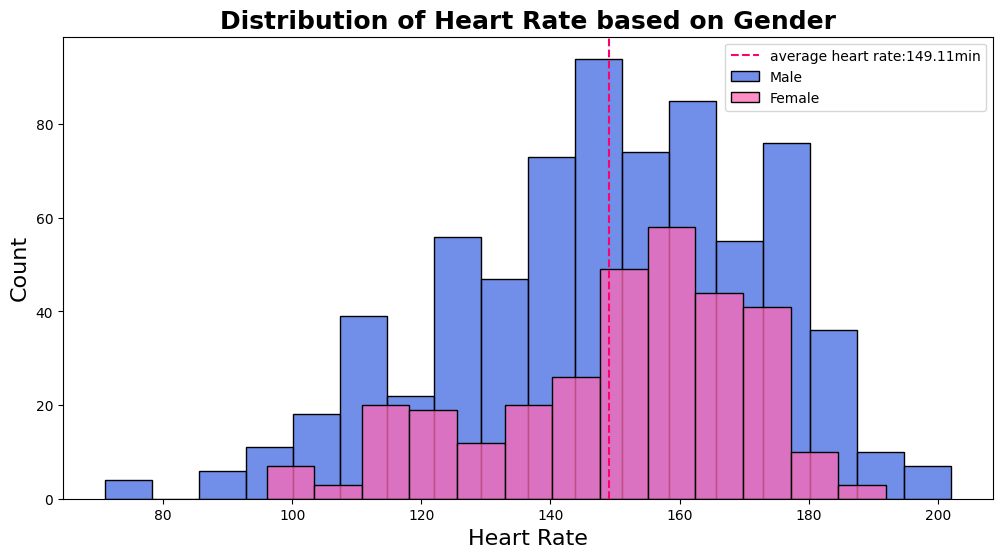

In [67]:
average_heart_rate=np.mean(data['Max_Heart_Rate'])
plt.figure(figsize=(12,6))
plt.title('Distribution of Heart Rate based on Gender',fontsize=18,fontweight='bold')
sns.histplot(data[data['Sex']=='Males'],x='Max_Heart_Rate' ,color='#4169E1',label='Male')
sns.histplot(data[data['Sex']=='Females'],x= 'Max_Heart_Rate',color='#FF69B4',label='Female')
plt.axvline(x=average_heart_rate,color= '#ff006e',linestyle='--',label=f'average heart rate:{average_heart_rate:.2f}min')
plt.xlabel('Heart Rate', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()
#plt.axvline(x=average_hr, color='#ff006e', linestyle='--', label=f'Average Heart Rate: {average_hr:.2f}/min')


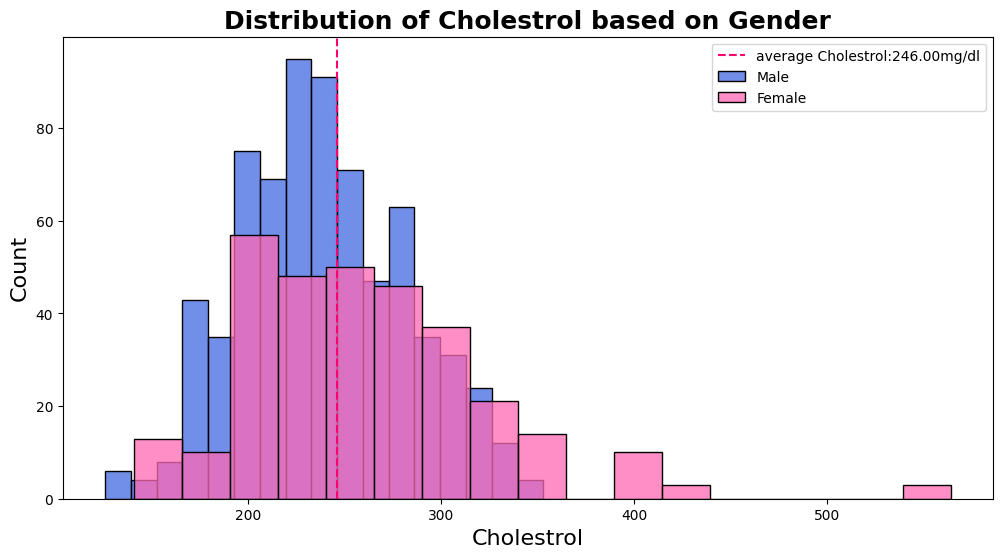

In [73]:
average_Cholestrol=np.mean(data['Cholestrol'])
plt.figure(figsize=(12,6))
plt.title('Distribution of Cholestrol based on Gender',fontsize=18,fontweight='bold')
sns.histplot(data[data['Sex']=='Males'],x= 'Cholestrol',color='#4169E1',label='Male')
sns.histplot(data[data['Sex']=='Females'],x= 'Cholestrol',color='#FF69B4',label='Female')
plt.axvline(x=average_Cholestrol,color='#ff006e',linestyle='--',label=f'average Cholestrol:{average_Cholestrol:.2f}mg/dl')
plt.xlabel('Cholestrol', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()

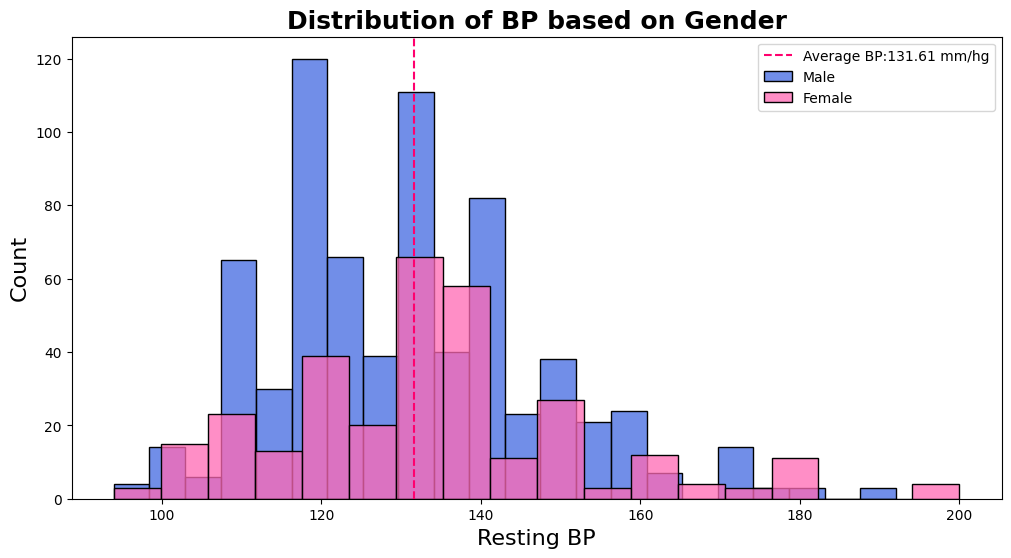

In [76]:
average_BP=np.mean(data['Resting_BP'])
plt.figure(figsize=(12,6))
plt.title('Distribution of BP based on Gender',fontsize=18,fontweight='bold')
sns.histplot(data[data['Sex']=='Males'],x='Resting_BP',color='#4169E1',label='Male')
sns.histplot(data[data['Sex']=='Females'],x='Resting_BP',color='#FF69B4',label='Female')
plt.axvline(x=average_BP,color='#ff006e',linestyle='--',label=f'Average BP:{average_BP:.2f} mm/hg')
plt.xlabel('Resting BP', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()
#'#4169E1' '#FF69B4' '#ff006e' Resting_BP

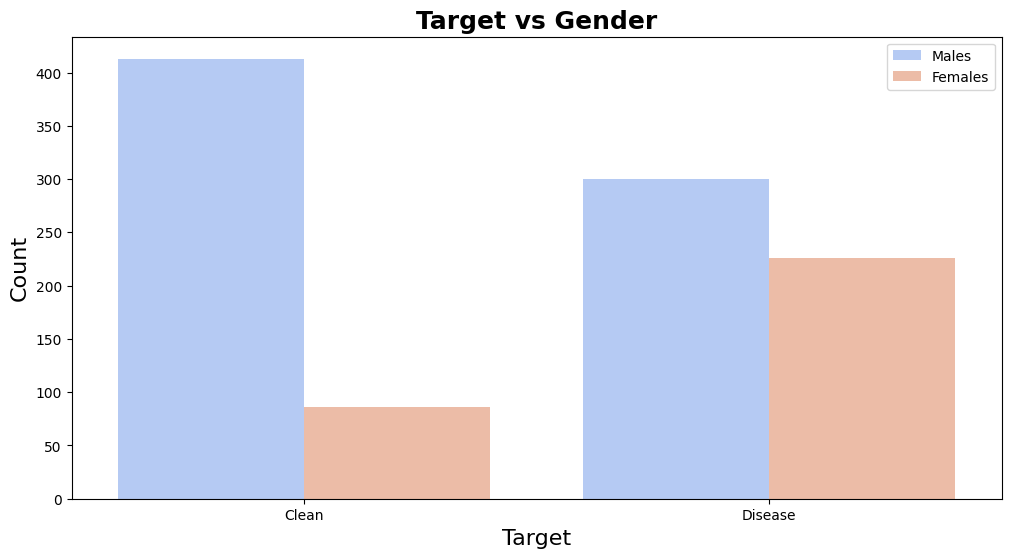

In [78]:
plt.figure(figsize=(12,6))
plt.title('Target vs Gender', fontsize=18, fontweight='bold')
sns.countplot(x=data['Target'], hue=data['Sex'], palette='coolwarm')
plt.xlabel('Target', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()